In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datos = pd.read_excel("/content/drive/MyDrive/Datos Ideam/datos precipitacion mensual.xlsx")

In [ ]:
print(datos)

        Fecha  Univalle  Pichinde  Farallones
0  2015-01-01      84.3       106        96.4
1  2015-02-01      39.3        71        70.4
2  2015-03-01     149.8       133       118.6
3  2015-04-01     162.4       392       153.5
4  2015-05-01      86.6       154        98.6
..        ...       ...       ...         ...
79 2021-08-01     140.8       261        80.0
80 2021-09-01     189.5       170        78.1
81 2021-10-01     187.0       243       174.0
82 2021-11-01     159.8       191       121.6
83 2021-12-01     226.5       136        74.2

[84 rows x 4 columns]


In [ ]:
Univalle = datos["Univalle"]
Pichinde = datos["Pichinde"]

Fechas = datos["Fecha"]

(<function matplotlib.pyplot.legend(*args, **kwargs)>,
 Text(0, 0.5, 'Precipitación mensual mm'))

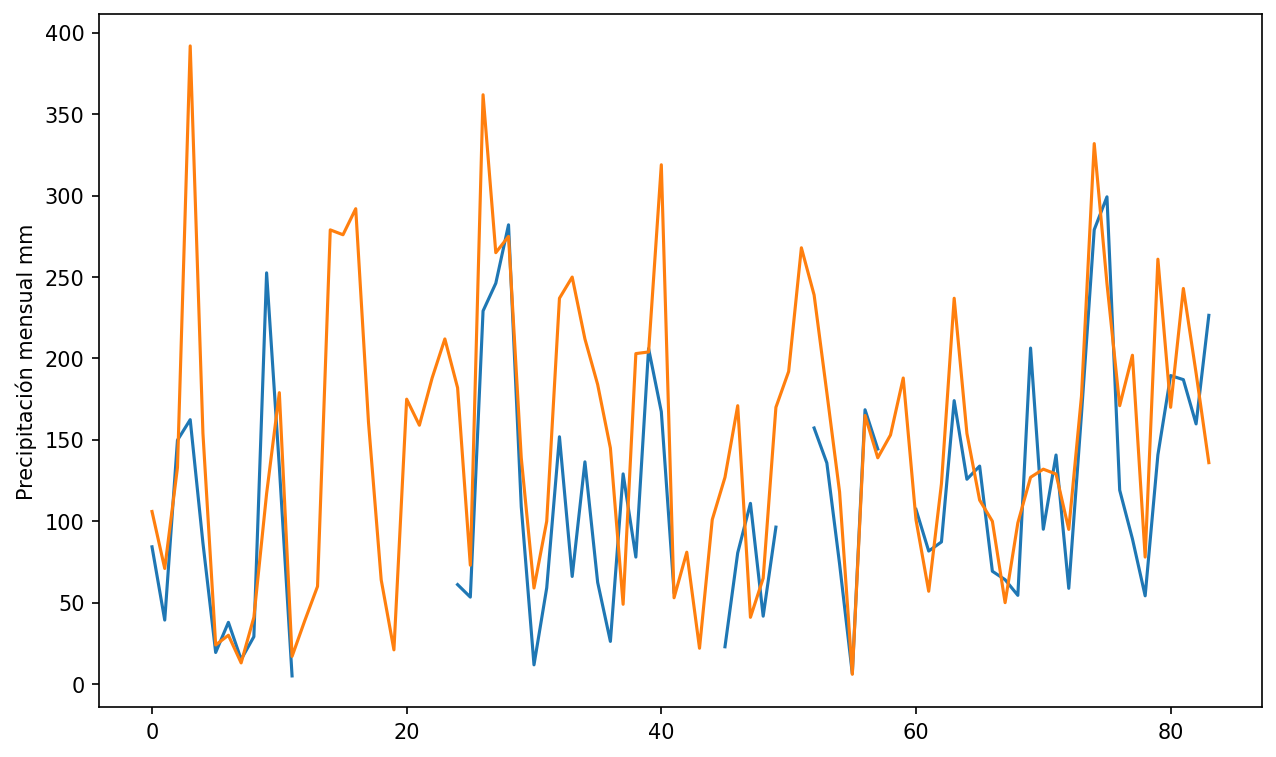

In [ ]:
plt.figure(figsize=(10, 6), dpi=150)

plt.plot(Univalle, label = "Univalle")
plt.plot(Pichinde, label = "Pichindé")
plt.legend, plt.ylabel("Precipitación mensual mm")


In [ ]:
Univalle_faltantes = Univalle[Univalle.isnull()]
#print(Univalle_faltantes)
dias_faltantes = Univalle_faltantes.index
#print(dias_faltantes)

Univalle_data = Univalle[Univalle.notnull()]
dias_con_data = Univalle_data.index

#print(dias_con_data)


# Datos de Pichinde
Pichinde_miss = Pichinde[dias_faltantes]
Pichinde_obs = Pichinde[dias_con_data]
print(Pichinde_obs)

0     106
1      71
2     133
3     392
4     154
     ... 
79    261
80    170
81    243
82    191
83    136
Name: Pichinde, Length: 66, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
Pichinde_train, Pichinde_test, Univalle_train, Univalle_test = train_test_split(
...     Pichinde_obs, Univalle_data, test_size=0.2, random_state=42)

In [ ]:
regressor = RandomForestRegressor(n_estimators=12, random_state=0, min_samples_leaf= 5)
regressor.fit(np.array(Pichinde_train).reshape(-1,1), np.array(Univalle_train).reshape(-1,1))

<ipython-input-69-82927ff012cd>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(np.array(Pichinde_train).reshape(-1,1), np.array(Univalle_train).reshape(-1,1))


RandomForestRegressor(min_samples_leaf=5, n_estimators=12, random_state=0)

In [ ]:
Univalle_pred = regressor.predict(np.array(Pichinde).reshape(-1,1))
#error = np.dot(Univalle_pred - np.array(Univalle_data), Univalle_pred - np.array(Univalle_data))/len(Univalle_data)
error = regressor.score(np.array(Pichinde_train).reshape(-1,1), np.array(Univalle_train).reshape(-1,1))
print(error)

0.568863625312614


In [ ]:
Univalle_pred_test = regressor.predict(np.array(Pichinde_test).reshape(-1,1))
#error = np.dot(Univalle_pred - np.array(Univalle_data), Univalle_pred - np.array(Univalle_data))/len(Univalle_data)
error = regressor.score(np.array(Pichinde_test).reshape(-1,1), np.array(Univalle_test).reshape(-1,1))
print(error)

0.3387913555786958


(<matplotlib.legend.Legend at 0x7f420110e3b0>,
 Text(0, 0.5, 'Precipitación mensual (mm)'),
 Text(0.5, 1.0, 'Imputación de Precipitación'))

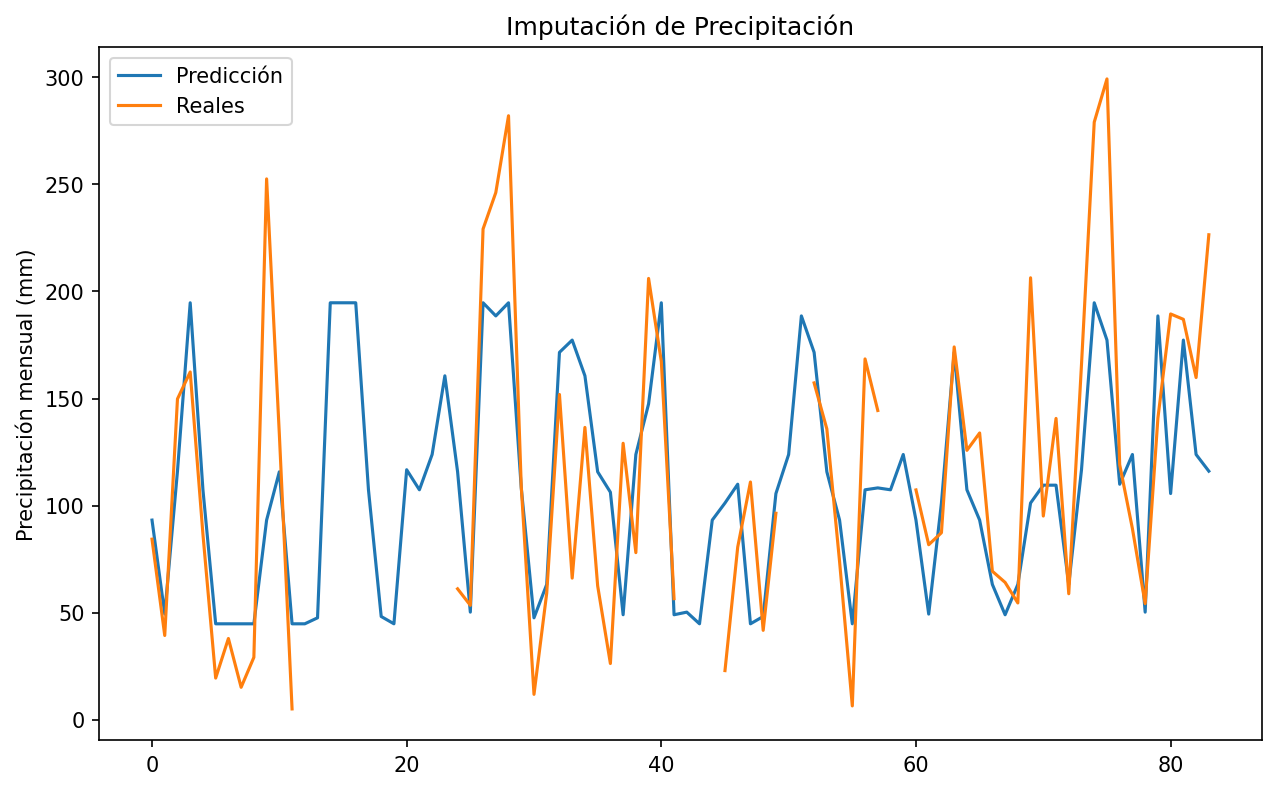

In [ ]:
plt.figure(figsize=(10, 6), dpi=150)

plt.plot(Univalle_pred, label = "Predicción")
plt.plot(Univalle, label = "Reales")
plt.legend(), plt.ylabel("Precipitación mensual (mm)"), plt.title("Imputación de Precipitación")

In [ ]:
Univalle_pred_falt = regressor.predict(np.array(Pichinde_miss).reshape(-1,1))
print(Univalle_pred_falt)

[ 44.75696308 194.72419386 194.72419386 194.72419386 107.36115575
  48.17906746  44.75696308 116.72615575 107.36115575 123.85230159
 160.6097891   50.2108631   44.75696308  93.20523063 123.85230159
 188.59443196 107.36115575 123.85230159]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

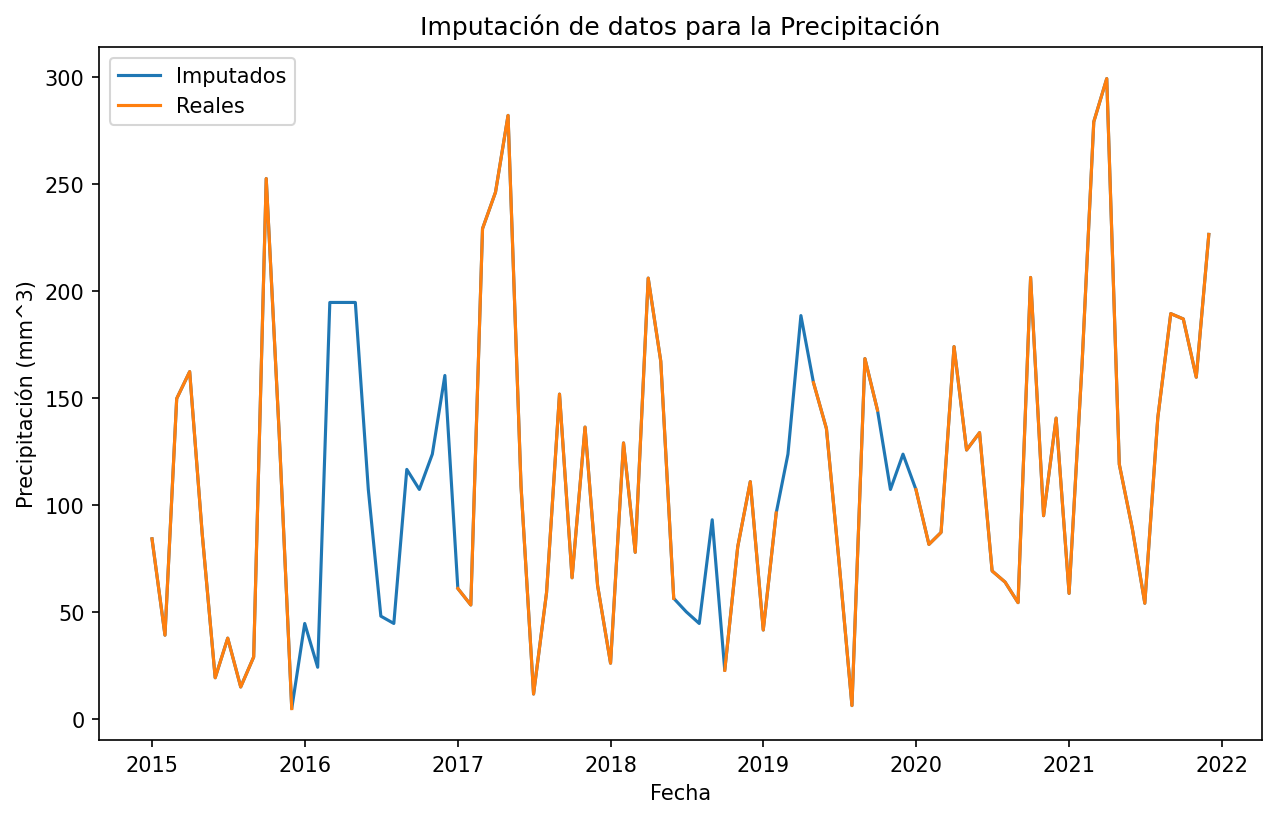

In [ ]:
#Añadir datos imputados a los datos reales
Nuevo_Univalle = pd.DataFrame(Univalle)

for i in range(len(Univalle_pred_falt)):
  Nuevo_Univalle["Univalle"].iloc[dias_faltantes[i]] = Univalle_pred_falt[i]



# for i in range(len(Univalle_pred_falt)):
#   Nuevo_Univalle.iloc[dias_faltantes[i]] = Univalle_pred_falt[i]

plt.figure(figsize=(10, 6), dpi=150)
plt.plot(Fechas, Nuevo_Univalle, label = "Imputados")
plt.plot(Fechas, datos["Univalle"], label = "Reales")
plt.legend(), plt.xlabel("Fecha"), plt.ylabel("Precipitación (mm^3)")
plt.title("Imputación de datos para la Precipitación")

from google.colab import files
plt.savefig("precip.png")
files.download("precip.png")

In [ ]:

Pred_final = np.zeros(len(Pichinde)).reshape(-1,1)
Pred_final = pd.DataFrame(Pred_final)
aux = pd.DataFrame(np.array(Univalle_pred).reshape(-1,1))

for i in range(len(dias_con_data)):
  Pred_final.loc[dias_con_data[i]] = aux.iloc[i]

#print(pd.DataFrame(np.array(Univalle_pred).reshape(-1,1)))
#print(Pred_final)
#print(Pred_final)
#print(pd.DataFrame(np.array(Univalle_pred).reshape(-1,1)))

Pred_final[Pred_final[0] == 0] = np.NaN

In [ ]:
#Descargar datos

Datos_imputados = datos.copy(deep = True)
Datos_imputados[0] = Nuevo_Univalle

Datos_imputados.isnull().values.any()

print(Datos_imputados)


        0    1      2
0    84.3  106   96.4
1    39.3   71   70.4
2   149.8  133  118.6
3   162.4  392  153.5
4    86.6  154   98.6
..    ...  ...    ...
79  140.8  261   80.0
80  189.5  170   78.1
81  187.0  243  174.0
82  159.8  191  121.6
83  226.5  136   74.2

[84 rows x 3 columns]


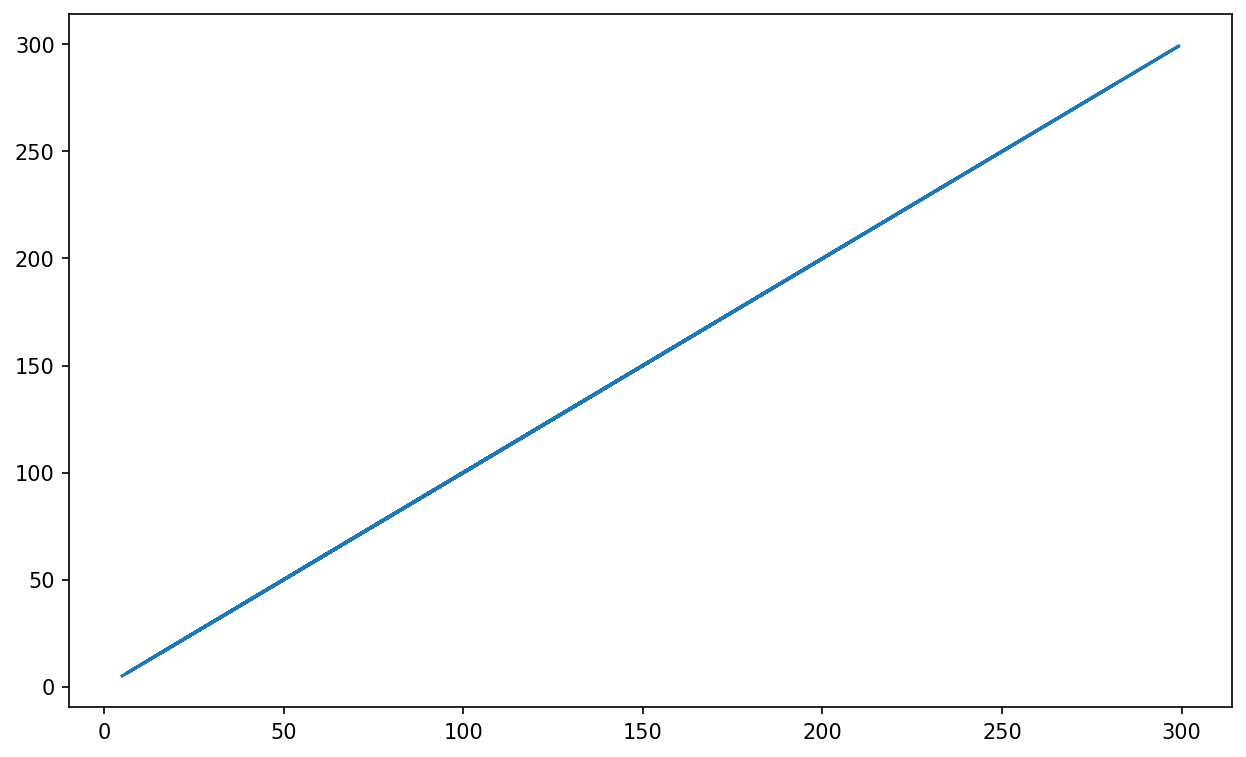

In [ ]:
plt.figure(figsize=(10, 6), dpi=150)
plt.plot(datos[0], Datos_imputados[0])
# plt.plot(datos[0], datos[0])

In [ ]:
from google.colab import files
Datos_imputados.to_csv('Datos imputados Precipitacion V2.csv', encoding = 'utf-8-sig')
files.download('Datos imputados Precipitacion V2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

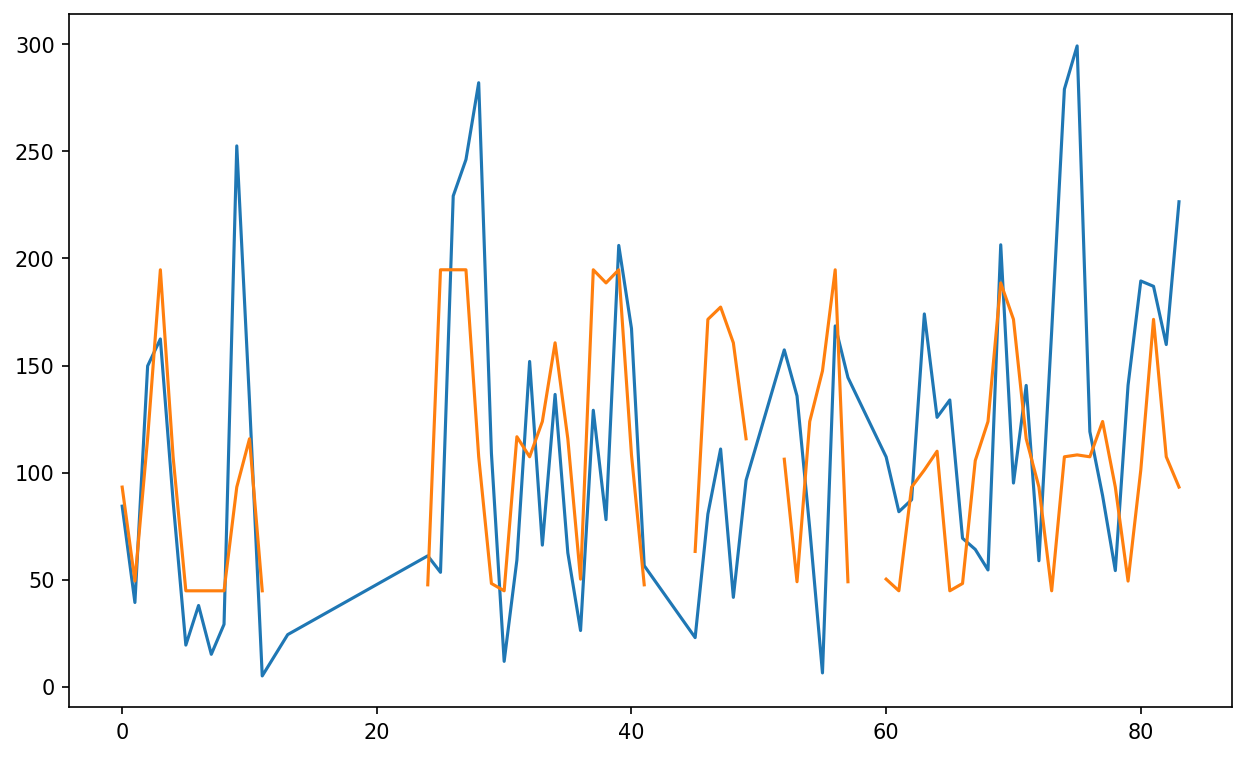

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6), dpi=150)

plt.plot(Univalle_data)
plt.plot(Pred_final)
#Univalle_data.plot(label = "real", color = "red")
#pd.DataFrame(Univalle_pred).plot(label = "prediccion", color = "blue")

In [ ]:
for i in range(len(Univalle_pred_falt)):
  Pred_final.iloc[dias_faltantes[i]] = Univalle_pred_falt[i]

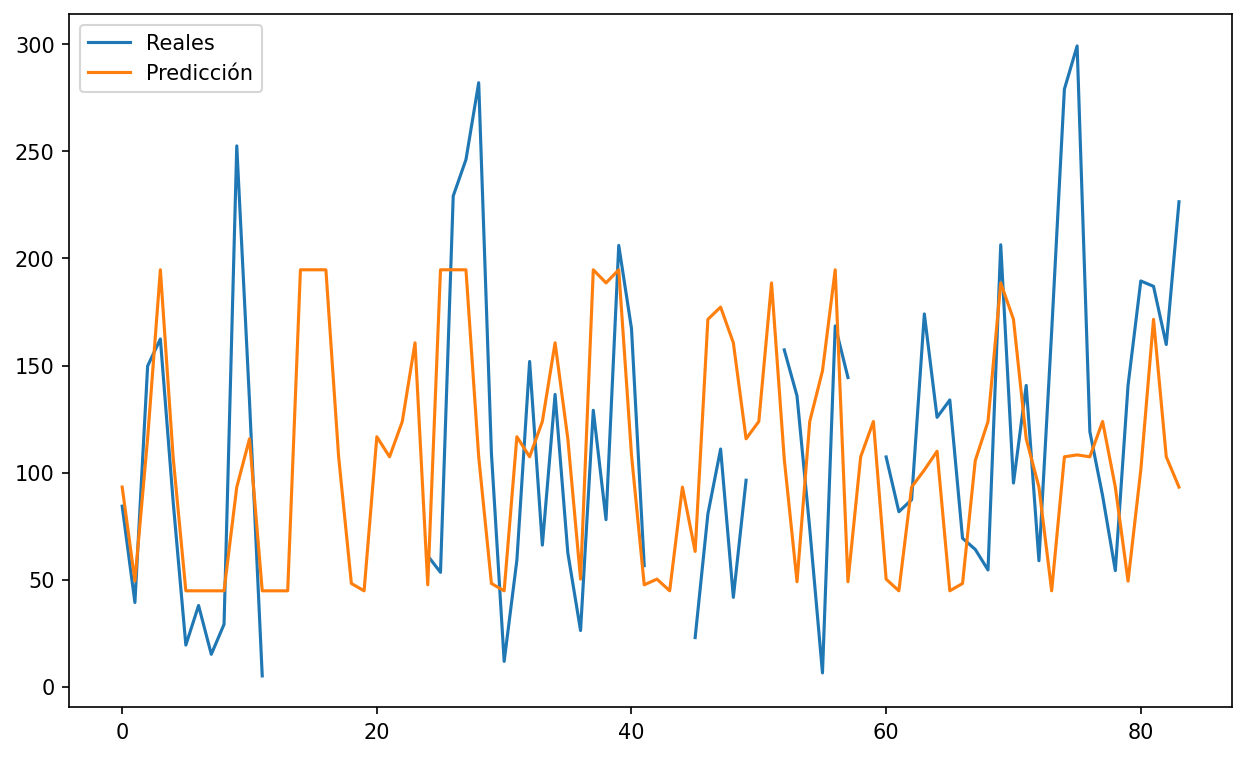

In [ ]:
plt.figure(figsize=(10, 6), dpi=150)

plt.plot(Univalle, label = "Reales")
plt.plot(Pred_final, label = "Predicción")
plt.legend()
#Univalle_data.plot(label = "real", color = "red")
#pd.DataFrame(Univalle_pred).plot(label = "prediccion", color = "blue")

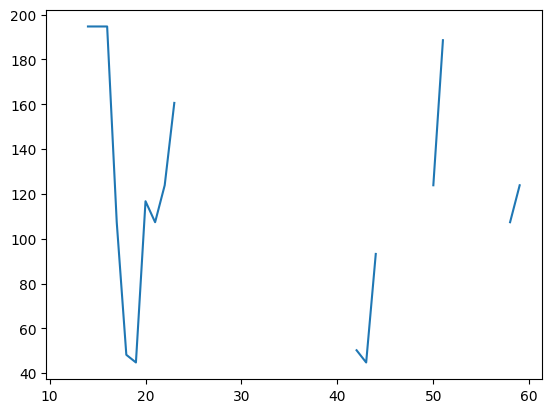

In [ ]:
predicciones = Pred_final
predicciones.iloc[dias_con_data] = np.NaN

plt.plot(Pred_final, label = "Predicción")

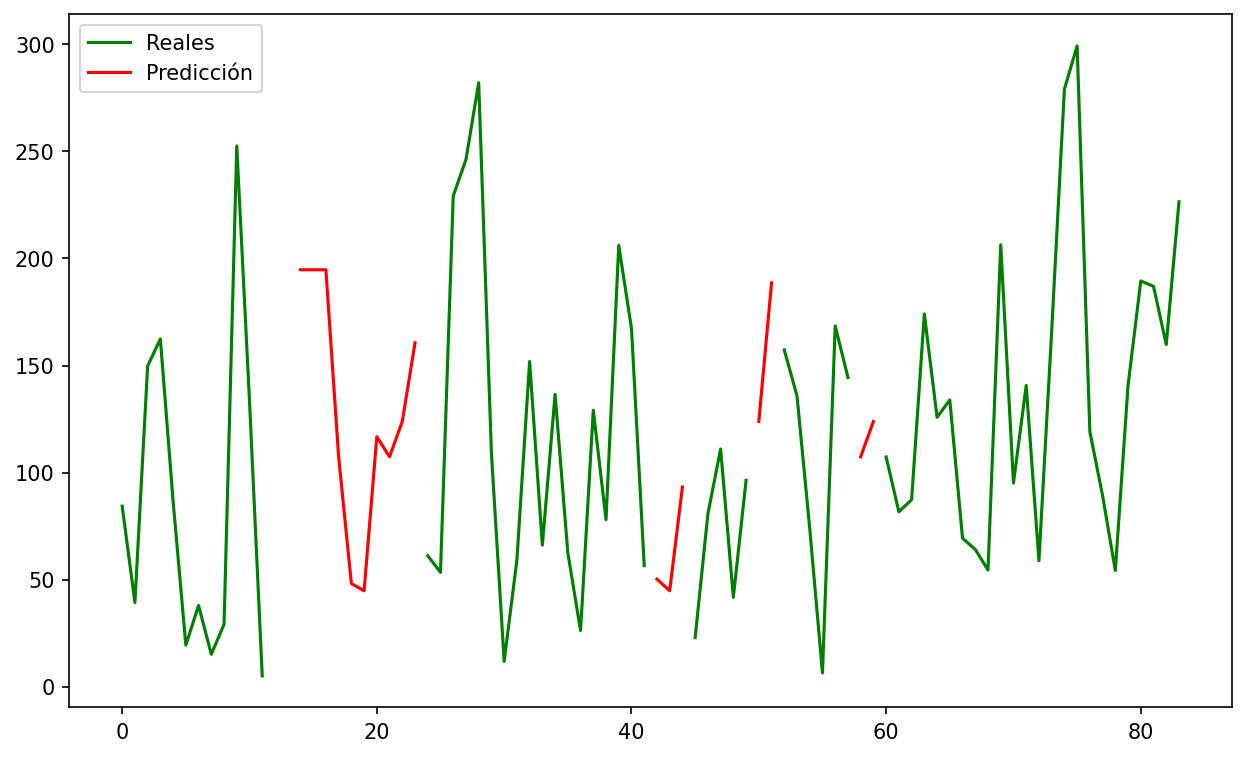

In [ ]:
plt.figure(figsize=(10, 6), dpi=150)

plt.plot(Univalle, label = "Reales", color = "green")
plt.plot(predicciones, label = "Predicción", color = "red")
plt.legend()
#Univalle_data.plot(label = "real", color = "red")
#pd.DataFrame(Univalle_pred).plot(label = "prediccion", color = "blue")

In [ ]:
#Entrenar el modelo con los datos de Pichinde y Sede IDEAM

train_data = datos[datos.columns[1:3]]
print(train_data)

regressor_doble_data = RandomForestRegressor(n_estimators=10, random_state=0)
regressor_doble_data.fit(np.array(train_data.iloc[dias_con_data]).reshape(-1,2), np.array(Univalle_data).reshape(-1,1))

error2 = regressor_doble_data.score(np.array(train_data.iloc[dias_con_data]).reshape(-1,2), np.array(Univalle_data).reshape(-1,1))
print(error2)

        1      2
0   106.0   96.4
1    71.0   70.4
2   133.0  118.6
3   392.0  153.5
4   154.0   98.6
..    ...    ...
79  261.0   80.0
80  170.0   78.1
81  243.0  174.0
82  191.0  121.6
83  136.0   74.2

[84 rows x 2 columns]
0.8652130596308893


<ipython-input-17-a2ed9163e4e6>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor_doble_data.fit(np.array(train_data.iloc[dias_con_data]).reshape(-1,2), np.array(Univalle_data).reshape(-1,1))


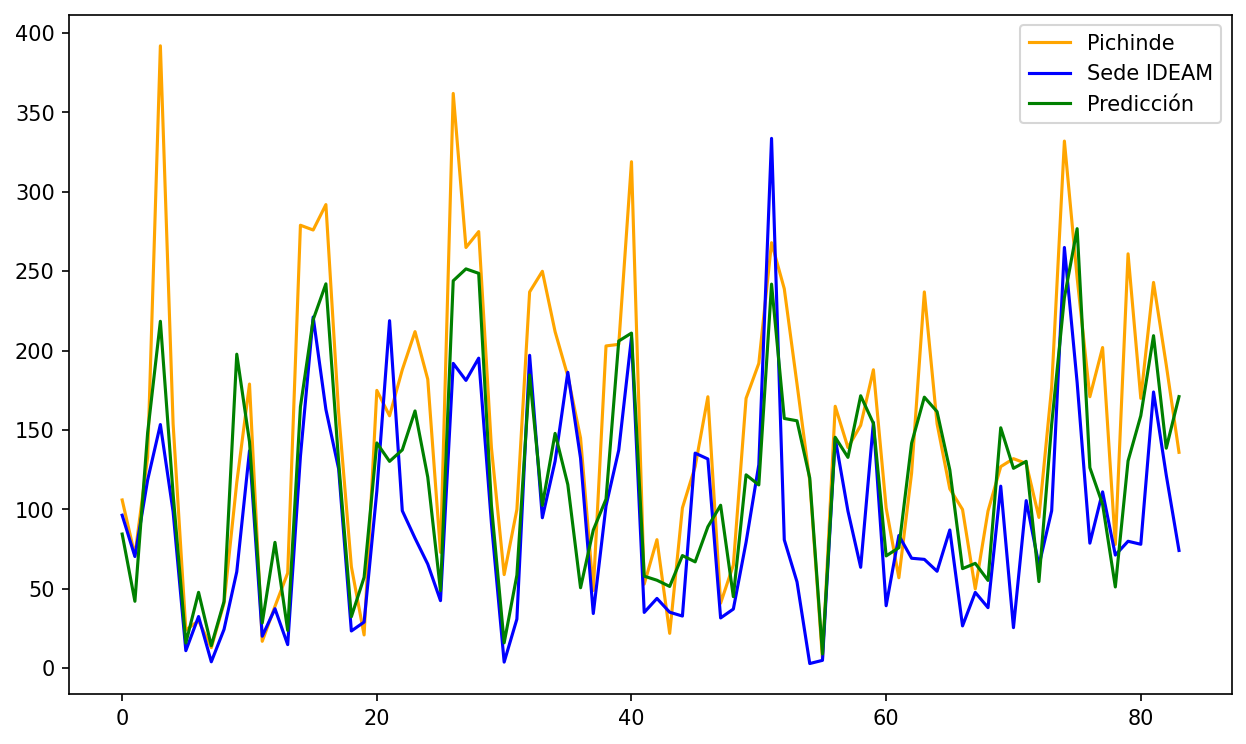

In [ ]:
train_data_con_data = train_data.iloc[dias_con_data]
pred_doble_data = regressor_doble_data.predict(np.array(train_data).reshape(-1,2))

plt.figure(figsize=(10, 6), dpi=150)
plt.plot(train_data[1], label = "Pichinde", color = "orange")
plt.plot(train_data[2], label = "Sede IDEAM", color = "blue")
plt.plot(pred_doble_data, label = "Predicción", color = "green")
plt.legend()

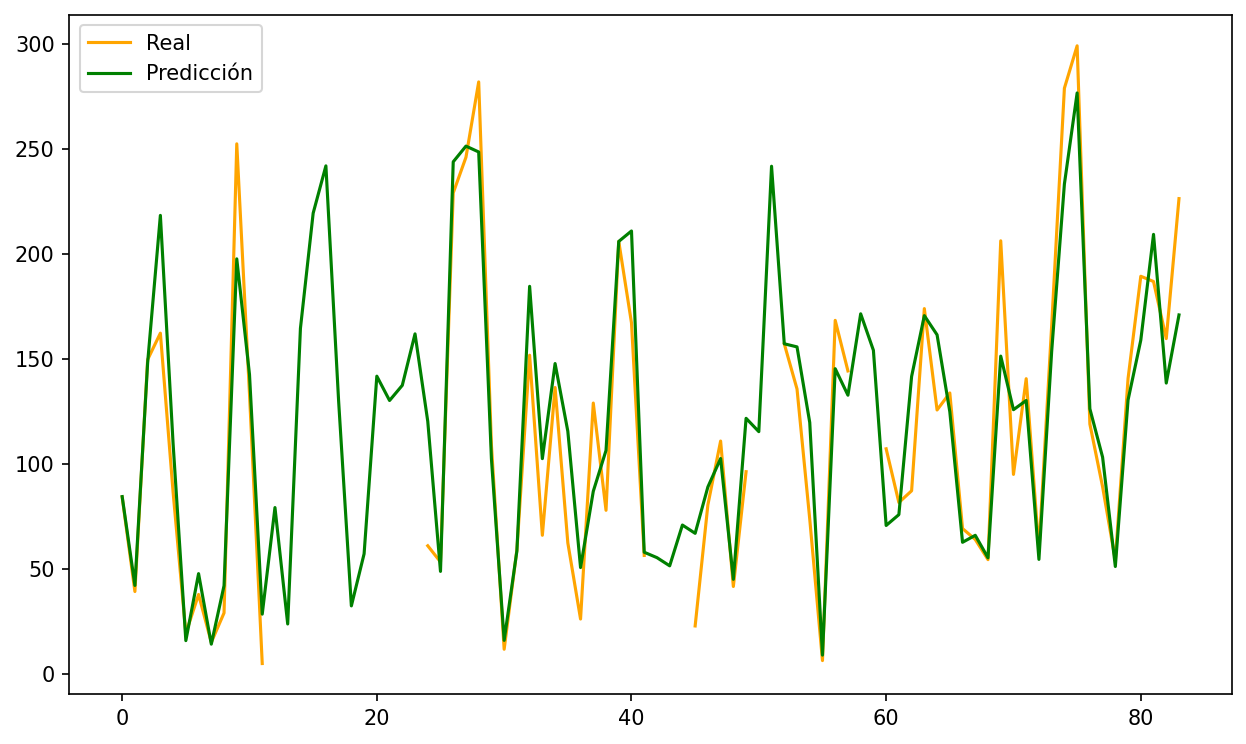

In [ ]:
plt.figure(figsize=(10, 6), dpi=150)
plt.plot(Univalle, label = "Real", color = "orange")
plt.plot(pred_doble_data, label = "Predicción", color = "green")
plt.legend()